In [1]:
# https://driftaway.coffee/body-mouthfeel-coffee-taste/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

In [3]:
data_arabica = pd.read_csv("./arabica_data_cleaned.csv")
data_robusta = pd.read_csv("./robusta_data_cleaned.csv")

## Preprocessing Function

In [4]:
def preprocessing_train(data_arabica, data_robusta):
    data_robusta.rename(
    {
        'Fragrance...Aroma': 'Aroma', 
        'Salt...Acid': 'Acidity', 
        'Bitter...Sweet': 'Sweetness', 
        'Mouthfeel': 'Body', 
        'Uniform.Cup': 'Uniformity'
    }, 
    axis=1, inplace=True)
    
    data = pd.concat([data_arabica, data_robusta], axis=0)
    
    df = data[
            ['Aroma', 
             'Flavor', 
             'Aftertaste', 
             'Acidity', 
             'Body', 
             'Balance', 
             'Uniformity', 
             'Clean.Cup', 
             'Sweetness', 
             'Cupper.Points', 
             'Category.One.Defects', 
             'Quakers',
             'Category.Two.Defects', 
             'Species']]
    df = df.reset_index()
    df = df.drop("index", axis = 1)
    
    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Aroma'] = pd.cut(df['Aroma'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Flavor'] = pd.cut(df['Flavor'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Aftertaste'] = pd.cut(df['Aftertaste'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Acidity'] = pd.cut(df['Acidity'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Body'] = pd.cut(df['Body'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Balance'] = pd.cut(df['Balance'], bins=cut_bins, labels=cut_labels)


    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Uniformity'] = pd.cut(df['Uniformity'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Clean.Cup'] = pd.cut(df['Clean.Cup'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Sweetness'] = pd.cut(df['Sweetness'], bins=cut_bins, labels=cut_labels)

    cut_labels = ["Okay", "Good", "Very Good", "Excellent", "Outstanding"] # 1 = "Okay", 2 = "Good", 3 = "Very Good", 4 = "Excellent", 5 = "Outstanding"
    cut_bins = [0, 6, 7, 8, 9, 10]
    df['Cupper.Points'] = pd.cut(df['Cupper.Points'], bins=cut_bins, labels=cut_labels)
    
    cut_labels = ["Specialty", "Premium", "Exchange", "Below Standard"] # 1 = Specialty Grade, 2 = Premium Coffee Grade, 3 = Exchange Coffee Grade
    cut_bins = [-1, 3, 15, 23, 100]
    df['Green.Beans.Grade'] = df["Category.One.Defects"].values + df["Category.Two.Defects"].values + df["Quakers"].values
    df['Green.Beans.Grade'] = pd.cut(df['Green.Beans.Grade'], bins=cut_bins, labels=cut_labels)
    
    df = df.dropna()
    df = df.reset_index()
    df = df.drop("index", axis = 1)

    model_df = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
           'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Species',
           'Green.Beans.Grade']]
    df1 = model_df.loc[model_df["Species"] == "Robusta"]
    frames = [model_df, df1, df1, df1, df1, df1, df1, df1, df1]
    model_df = pd.concat(frames)
    
    df = model_df.copy()
    
    le_aroma = LabelEncoder()
    le_flavor = LabelEncoder()
    le_aftertaste = LabelEncoder()
    le_acidity = LabelEncoder()
    le_body = LabelEncoder()
    le_balance = LabelEncoder()
    le_uniformity = LabelEncoder()
    le_clean_cup = LabelEncoder()
    le_sweetness = LabelEncoder()
    le_cupper_points = LabelEncoder()
    le_species = LabelEncoder()
    le_green_beans_grade = LabelEncoder()
    
    
    df['Aroma.n'] = le_aroma.fit_transform(df['Aroma'])
    df['Flavor.n'] = le_flavor.fit_transform(df['Flavor'])
    df['Aftertaste.n'] = le_aftertaste.fit_transform(df['Aftertaste'])
    df['Acidity.n'] = le_acidity.fit_transform(df['Acidity'])
    df['Body.n'] = le_body.fit_transform(df['Body'])
    df['Balance.n'] = le_balance.fit_transform(df['Balance'])
    df['Uniformity.n'] = le_uniformity.fit_transform(df['Uniformity'])
    df['Clean.Cup.n'] = le_clean_cup.fit_transform(df['Clean.Cup'])
    df['Sweetness.n'] = le_sweetness.fit_transform(df['Sweetness'])
    df['Cupper.Points.n'] = le_cupper_points.fit_transform(df['Cupper.Points'])
    df['Green.Beans.Grade.n'] = le_green_beans_grade.fit_transform(df['Green.Beans.Grade'])
    df['Species.n'] = le_species.fit_transform(df['Species'])
    
    df = df.drop(columns=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
           'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Species',
           'Green.Beans.Grade'])
    X = df.drop(columns=["Species.n"])
    Y = df["Species.n"]  
    
    return X, Y

## SVM

In [5]:
def svm(X_train, y_train):
    model = SVC(kernel='linear', probability=True) # Linear Kernel
    model.fit(X_train, y_train)
    return model

## Logistic Regression

In [6]:
def lr(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

## K Nearest Neighbour

In [7]:
def knn(X_train, y_train, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    return model

## Decision Tree

In [8]:
def decision_tree(X_train, y_train):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train,y_train)
    return model

## Random Forest

In [9]:
def random_forest(X_train, y_train, n_estimators):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state = 42)
    model.fit(X_train, y_train)
    return model

## Prediction Function

In [10]:
def pred(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

## Accuracy Function

In [11]:
def accuracy(y_test, y_pred):
    print("Accuracy : ")
    print(metrics.accuracy_score(y_test, y_pred.round()))
    print()
    print("###############################################")
    print()
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred.round()))
    print()
    print("###############################################")
    print()
    print("Classification Report")
    print(classification_report(y_test,y_pred.round()))
    print()
    print()
    print()
    print()

## Error Function

In [12]:
def error(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Search Optimal K

In [13]:
def plot_for_k(X, y):
    
    accuracy_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        score=cross_val_score(knn,X,y,cv=10)
        accuracy_rate.append(score.mean())
        
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

## Testing K

In [14]:
def check_k(X_train, y_train, X_test, y_test, k):
    # NOW WITH K=k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K=2')
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))

## Preprocessing Fn Call

In [15]:
X, y = preprocessing_train(data_arabica, data_robusta)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 20% test

## Model Save

In [16]:
def model_save(model, model_name):
    joblib_file = "./models/" + model_name 
    joblib.dump(model, joblib_file)

## Ploting graph for k range from 1 to 40

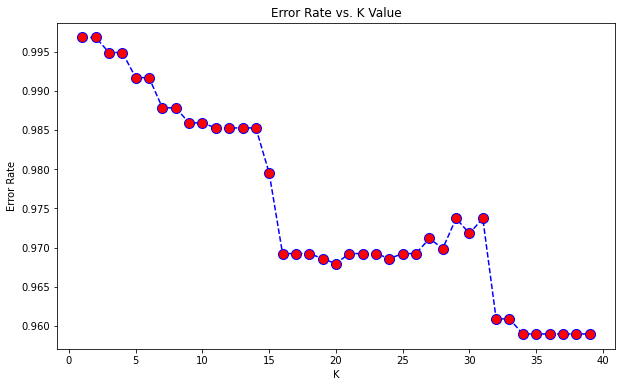

In [17]:
plot_for_k(X, y)

## Creating and Fitting Model

In [18]:
svm_model = svm(X_train, y_train)
lr_model = lr(X_train, y_train)
knn_model = knn(X_train, y_train, 32)
decision_tree_model = decision_tree(X_train, y_train)
random_forest_model = random_forest(X_train, y_train, 30)

## Predicting for X_test

In [19]:
y_hat_svm = pred(svm_model, X_test)
y_hat_lr = pred(lr_model, X_test)
y_hat_knn = pred(knn_model, X_test)
y_hat_dt = pred(decision_tree_model, X_test)
y_hat_rf = pred(random_forest_model, X_test)

## Checking Accuracy for models

In [20]:
#SVM
print("Support Vector Machine : ")
print()
accuracy(y_test, y_hat_svm)

#Logistic Regression
print("Logistic Regression : ")
print()
accuracy(y_test, y_hat_lr)

#K Nearest Neighbors
print("K Nearest Neighbors : ")
print()
accuracy(y_test, y_hat_knn)

#Decision Tree
print("Decision Tree : ")
print()
accuracy(y_test, y_hat_dt)

#Random Forest
print("Random Forest : ")
print()
accuracy(y_test, y_hat_rf)

Support Vector Machine : 

Accuracy : 
0.9839743589743589

###############################################

Confusion Matrix
[[260   3]
 [  2  47]]

###############################################

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       263
           1       0.94      0.96      0.95        49

    accuracy                           0.98       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.98      0.98      0.98       312





Logistic Regression : 

Accuracy : 
0.9839743589743589

###############################################

Confusion Matrix
[[260   3]
 [  2  47]]

###############################################

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       263
           1       0.94      0.96      0.95        49

    accuracy                           0.98       312
   macro avg  

## Checking Error

In [21]:
#SVM
print()
print("Support Vector Machine : ")
print()
error(y_test, y_hat_svm)

#Logistic Regression
print()
print("Logistic Regression : ")
print()
error(y_test, y_hat_lr)

#K Nearest Neighbors
print()
print("K Nearest Neighbors : ")
print()
error(y_test, y_hat_knn)

#Decision Tree
print()
print("Decision Tree : ")
print()
error(y_test, y_hat_dt)

#Random Forest
print()
print("Random Forest : ")
print()
error(y_test, y_hat_rf)



Support Vector Machine : 

Mean Absolute Error: 0.016025641025641024
Mean Squared Error: 0.016025641025641024
Root Mean Squared Error: 0.12659242088545833

Logistic Regression : 

Mean Absolute Error: 0.016025641025641024
Mean Squared Error: 0.016025641025641024
Root Mean Squared Error: 0.12659242088545833

K Nearest Neighbors : 

Mean Absolute Error: 0.02564102564102564
Mean Squared Error: 0.02564102564102564
Root Mean Squared Error: 0.16012815380508713

Decision Tree : 

Mean Absolute Error: 0.003205128205128205
Mean Squared Error: 0.003205128205128205
Root Mean Squared Error: 0.05661385170722979

Random Forest : 

Mean Absolute Error: 0.003205128205128205
Mean Squared Error: 0.003205128205128205
Root Mean Squared Error: 0.05661385170722979


## Model Save call

In [22]:
#SVM
model_save(svm_model, "svm_model.pkl")
print()
print("Saved Support Vector Machine Model")
print()

#Logistic Regression
model_save(lr_model, "lr_model.pkl")
print()
print("Saved Logistic Regression Model")
print()

#K Nearest Neighbors
model_save(knn_model, "knn_model.pkl")
print()
print("Saved K Nearest Neighbors Model")
print()

#Decision Tree
model_save(decision_tree_model, "decision_tree_model.pkl")
print()
print("Saved Decision Tree Model")
print()

#Random Forest
model_save(random_forest_model, "random_forest_model.pkl")
print()
print("Saved Random Forest Model")
print()


Saved Support Vector Machine Model


Saved Logistic Regression Model


Saved K Nearest Neighbors Model


Saved Decision Tree Model


Saved Random Forest Model



In [24]:
# svm_model.predict([[3,2,2,3,3,3,3,3,3,4,3]])

array([0])